# Effect of the Sigma Parameter for the Polyol on the Specific Volume

I found that when I increased the hard-sphere diameter $\sigma$ of the polyol, the specific volume shifted from increasing with pressure to decreasing. The following analysis seeks to model why.

We first compute the density ratio in terms of the weight fraction of CO2.

\begin{align*}
    w &= \frac{\rho_{CO2}}{\rho_{poly} + \rho_{CO2}}\\
    w &= \frac{\frac{\rho_{CO2}}{\rho_{poly}}}{1 + \frac{\rho_{CO2}}{\rho_{poly}}}\\
    \frac{\rho_{CO2}}{\rho_{poly}} &= \frac{w}{1-w}\\
\end{align*}

Grows superlinearly if we assume $w$ grows roughly linearly with pressure $p$.

Next, we note that the mass density is the number density times the mass of a bead $m_i$,

\begin{align*}
    \rho_i &= n_i m_i\\
\end{align*}

We furthermore assume that the packing fraction $\eta$ remains the same. The packing fraction is calculated as

\begin{align*}
    \eta &= n_{poly} v_{poly} + n_{CO2} v_{CO2}\\
\end{align*}

where $v_i$ is the volume of one bead. We can rewrite the packing fraction as

\begin{align*}
    \eta &= n_{poly} \left(v_{poly} + \frac{n_{CO2}}{n_{poly}}v_{CO2}\right)\\
    \eta &= n_{poly} \left(v_{poly} + \frac{\rho_{CO2}}{\rho_{poly}}\frac{m_{poly}}{m_{CO2}}v_{CO2}\right)\\
    n_{poly} &= \frac{\eta}{v_{poly} + \frac{\rho_{CO2}}{\rho_{poly}}\frac{m_{poly}}{m_{CO2}}v_{CO2}}\\
    \rho_{poly} &=  \frac{m_{poly}\eta}{v_{poly} + \frac{\rho_{CO2}}{\rho_{poly}}\frac{m_{poly}}{m_{CO2}}v_{CO2}}\\
    \rho_{poly} &=  \frac{m_{poly}\eta}{v_{poly} + \frac{w}{1-w}\frac{m_{poly}}{m_{CO2}}v_{CO2}}\\
\end{align*}

Finally, we calculate the overall density.

\begin{align*}
    \rho &= \rho_{CO2} + \rho_{poly}\\
    &= \rho_{poly} \left(1 + \frac{\rho_{CO2}}{\rho_{poly}}\right)\\
    &= \rho_{poly} \left(1 + \frac{w}{1-w}\right)\\
    &= \frac{\rho_{poly}}{1-w}\\
    &= \frac{m_{poly}\eta}{(1-w)v_{poly} + w\frac{m_{poly}}{m_{CO2}}v_{CO2}}\\
    &= \frac{m_{poly}m_{CO2}\eta}{(1-w) m_{poly}\frac{\pi}{6}\sigma_{poly}^3 + w m_{CO2}\frac{\pi}{6}\sigma_{CO2}^3 }\\
    &= \frac{A}{(1-w) m_{poly}\sigma_{poly}^3 + w m_{CO2}\sigma_{CO2}^3 }\\
\end{align*}

where 

\begin{align*}
    A &= \frac{6 m_{poly} m_{CO2} \eta}{\pi}\\
\end{align*}

We plot $\rho$ as a function of $w$ below.

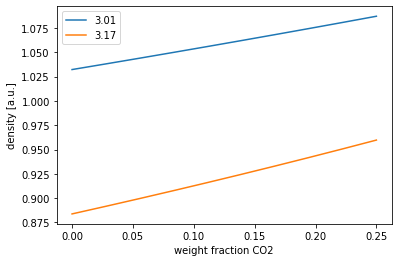

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def rho(w, sPPG):
    sCO2 = 2.79
    mPPG = 2700/123
    mCO2 = 44/2
    eta = 0.67 # random estimate of packing fraction
    A = 6*mPPG*mCO2*eta/np.pi
    
    return A/((1-w)*mPPG*sPPG**3 + w*mCO2*sCO2**3)

w = np.linspace(0, 0.25, 10)
plt.plot(w, rho(w, 3.01), label=r'$\sigma_{PPG} = 3.01$')
plt.plot(w, rho(w, 3.17), label=r'$\sigma_{PPG} = 3.17$')
plt.xlabel('weight fraction CO2')
plt.ylabel('density [a.u.]')
plt.legend()

While we don't replicate the switch from decreasing density with weight fraction of CO2 to increasing with increasing $\sigma$ from 3.01 A to 3.17 A, as we saw in the PC-SAFT predictions, but we can show that the density grows more quickly with larger $\sigma$.